In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv("housing_price_dataset.csv")
raw_data

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


array([[<Axes: title={'center': 'SquareFeet'}>,
        <Axes: title={'center': 'Bedrooms'}>],
       [<Axes: title={'center': 'Bathrooms'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >]], dtype=object)

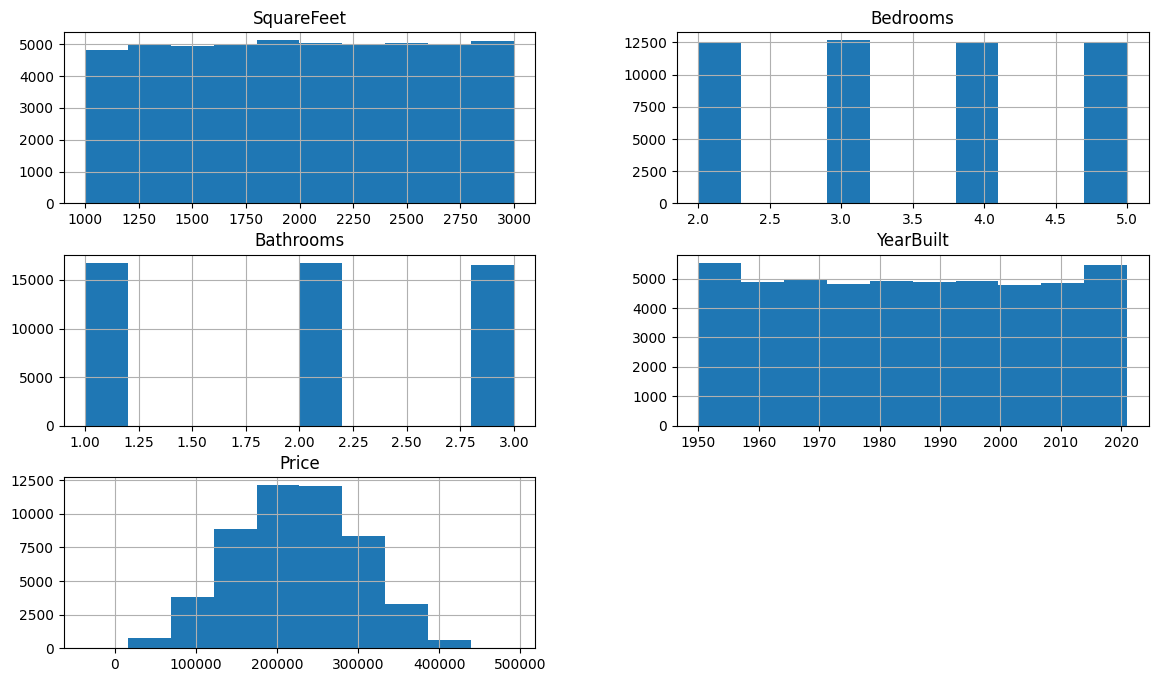

In [8]:
raw_data.hist(figsize=(14,8))

In [9]:
raw_data.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


In [13]:
data = raw_data[~(raw_data['Price'] <= 0)].copy()

In [19]:
data['sqrf/price'] = round(data['Price'] / data['SquareFeet'],2)

In [22]:
data

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,sqrf/price
0,2126,4,1,Rural,1969,215355.283618,101.30
1,2459,3,2,Rural,1980,195014.221626,79.31
2,1860,2,1,Suburb,1970,306891.012076,165.00
3,2294,2,1,Urban,1996,206786.787153,90.14
4,2130,5,2,Suburb,2001,272436.239065,127.90
...,...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895,78.07
49996,2854,2,2,Suburb,1988,374507.656727,131.22
49997,2979,5,3,Suburb,1962,384110.555590,128.94
49998,2596,5,2,Rural,1984,380512.685957,146.58


In [25]:
data[data['sqrf/price'] < 70]

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,sqrf/price
27,1385,4,3,Rural,1996,88030.541853,63.56
32,1459,3,2,Rural,2006,77493.931439,53.11
37,1856,4,2,Rural,1959,124711.707855,67.19
51,1562,3,3,Rural,2013,89378.550621,57.22
60,1646,4,3,Suburb,1994,91423.619646,55.54
...,...,...,...,...,...,...,...
49887,1807,3,1,Urban,2009,113218.634071,62.66
49914,1545,3,3,Rural,1975,105965.456998,68.59
49945,2048,2,1,Urban,1969,127820.829028,62.41
49964,1516,2,2,Urban,1958,92932.625267,61.30


<Axes: >

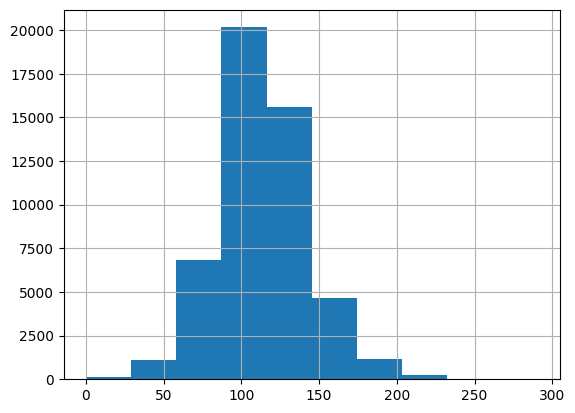

In [26]:
data['sqrf/price'].hist()

In [33]:
data = data[~(data['sqrf/price'] < 30)]

In [41]:
data = data[data['sqrf/price'] <= 200]

In [42]:
data

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,sqrf/price
0,2126,4,1,Rural,1969,215355.283618,101.30
1,2459,3,2,Rural,1980,195014.221626,79.31
2,1860,2,1,Suburb,1970,306891.012076,165.00
3,2294,2,1,Urban,1996,206786.787153,90.14
4,2130,5,2,Suburb,2001,272436.239065,127.90
...,...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895,78.07
49996,2854,2,2,Suburb,1988,374507.656727,131.22
49997,2979,5,3,Suburb,1962,384110.555590,128.94
49998,2596,5,2,Rural,1984,380512.685957,146.58


In [48]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [45]:
df_input = data.drop(['Price','sqrf/price'],axis=1)

In [49]:
preprocesor = ColumnTransformer(
    transformers = [
        ('MinMaxScaler', MinMaxScaler(), ['SquareFeet','Bedrooms','Bathrooms','YearBuilt']),
        ('OHE', OneHotEncoder(), ['Neighborhood'])
    ]
)

In [51]:
from sklearn.linear_model import LinearRegression


lr_pipeline = Pipeline(steps=[
    ('preprocesor',preprocesor),
    ('model',LinearRegression())
])

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [54]:
df_target = data['Price']